# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O mean_reversion_bollinger_bands.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/mean_reversion_bollinger_bands.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' mean_reversion_bollinger_bands.py

In [5]:
from mean_reversion_bollinger_bands import MeanReversionBollingerBands as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 135451,
 'strategyId': '8d521bfc726444e6bee9868cb893982d'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('HINDALCO', exchange='NSE')
instrument

[{'id': 29, 'value': 'NSE:HINDALCO'},
 {'id': 1674172, 'value': 'NSE:HINDALCO.AF'},
 {'id': 1672482, 'value': 'NSE:HINDALCO.BL'},
 {'id': 24815, 'value': 'NSE:HINDALCO20NOV125CE'},
 {'id': 24816, 'value': 'NSE:HINDALCO20NOV125PE'},
 {'id': 24817, 'value': 'NSE:HINDALCO20NOV130CE'},
 {'id': 24818, 'value': 'NSE:HINDALCO20NOV130PE'},
 {'id': 24819, 'value': 'NSE:HINDALCO20NOV135CE'},
 {'id': 24820, 'value': 'NSE:HINDALCO20NOV135PE'},
 {'id': 24821, 'value': 'NSE:HINDALCO20NOV140CE'}]

## Setup Parameters

In [9]:
parameters = {
  'TIMEPERIOD':2,
   'STD_DEVIATION':20
}

In [10]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530',
    instrument='NSE:HINDALCO', 
    lots=2,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Mean Reversion Bollinger Bands' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ Mean Reversion Bollinger Bands         │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:HINDALCO']                       │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 2                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp         

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-10-23 18:31:35] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-23 18:31:35] Sanity checks on cfg successful.
[2023-10-23 18:31:35] Currency set to "INR"
[2023-10-23 18:31:35] Setting up broker connection...
[2023-10-23 18:31:36] Broker connection has been setup successfully.
[2023-10-23 18:31:36] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2023-10-23 18:31:36] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-23 18:31:36] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-23 18:31:36] Reading strategy...
[2023-10-23 18:31:36] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,HINDALCO,2021-08-13 09:15:00+05:30,BUY,2,₹,437.40,2021-08-13 15:30:00+05:30,SELL,2,₹,441.60,8.4,8.4,0,8.4
1,NSE,HINDALCO,2021-08-16 12:15:00+05:30,BUY,2,₹,439.45,2021-08-16 15:30:00+05:30,SELL,2,₹,441.90,4.9,13.3,0,4.9
2,NSE,HINDALCO,2021-08-18 14:15:00+05:30,SELL,2,₹,425.80,2021-08-18 15:30:00+05:30,BUY,2,₹,427.40,-3.2,10.1,0,-3.2
3,NSE,HINDALCO,2021-08-20 11:15:00+05:30,BUY,2,₹,407.10,2021-08-20 15:30:00+05:30,SELL,2,₹,401.25,-11.7,-1.6,0,-11.7
4,NSE,HINDALCO,2021-09-01 13:15:00+05:30,BUY,2,₹,464.75,2021-09-01 15:30:00+05:30,SELL,2,₹,457.30,-14.9,-16.5,0,-14.9
5,NSE,HINDALCO,2021-09-02 13:15:00+05:30,BUY,2,₹,457.25,2021-09-02 15:30:00+05:30,SELL,2,₹,456.60,-1.3,-17.8,0,-1.3
6,NSE,HINDALCO,2021-09-03 13:15:00+05:30,BUY,2,₹,460.90,2021-09-03 15:30:00+05:30,SELL,2,₹,460.95,0.1,-17.7,0,0.1
7,NSE,HINDALCO,2021-09-06 09:15:00+05:30,BUY,2,₹,466.95,2021-09-06 12:15:00+05:30,SELL,2,₹,462.35,-9.2,-26.9,0,-9.2
8,NSE,HINDALCO,2021-09-06 12:15:00+05:30,SELL,2,₹,462.35,2021-09-06 15:30:00+05:30,BUY,2,₹,468.30,-11.9,-38.8,0,-11.9
9,NSE,HINDALCO,2021-09-16 14:15:00+05:30,BUY,2,₹,482.80,2021-09-16 15:30:00+05:30,SELL,2,₹,483.80,2.0,-36.8,0,2.0


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-13
End Period          2023-07-27
Risk-Free Rate      0.0%
Time in Market      87.0%

Cumulative Return   -0.0%
CAGR﹪              -0.0%

Sharpe              -0.31
Prob. Sharpe Ratio  39.01%
Sortino             -0.42
Sortino/√2          -0.3
Omega               0.94

Max Drawdown        -0.0%
Longest DD Days     549

Gain/Pain Ratio     -0.06
Gain/Pain (1M)      -0.17

Payoff Ratio        0.94
Profit Factor       0.94
Common Sense Ratio  0.99
CPC Index           0.45
Tail Ratio          1.05
Outlier Win Ratio   4.1
Outlier Loss Ratio  3.3

MTD                 0.0%
3M                  -0.0%
6M                  0.0%
YTD                 0.0%
1Y                  -0.0%
3Y (ann.)           -0.0%
5Y (ann.)           -0.0%
10Y (ann.)          -0.0%
All-time (ann.)     -0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  172
Recovery Factor     -0.3
Ulcer Index         0.0
Serenity Index      -0.05


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-13
End Period                 2023-07-27
Risk-Free Rate             0.0%
Time in Market             87.0%

Cumulative Return          -0.0%
CAGR﹪                     -0.0%

Sharpe                     -0.31
Prob. Sharpe Ratio         39.01%
Smart Sharpe               -0.28
Sortino                    -0.42
Smart Sortino              -0.38
Sortino/√2                 -0.3
Smart Sortino/√2           -0.27
Omega                      0.94

Max Drawdown               -0.0%
Longest DD Days            549
Volatility (ann.)          0.0%
Calmar                     -0.15
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.0%
Kelly Criterion            -2.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       5
M

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-24,2022-12-21,2023-07-27,549,-1.556000e-05,-1.382000e-05
2,2021-08-18,2021-11-11,2021-12-31,134,-7.180000e-06,-6.210000e-06
3,2022-01-14,2022-01-18,2022-01-18,4,-7.300000e-07,-4.000000e-07
4,2022-01-03,2022-01-03,2022-01-07,3,-7.000000e-07,0.000000e+00


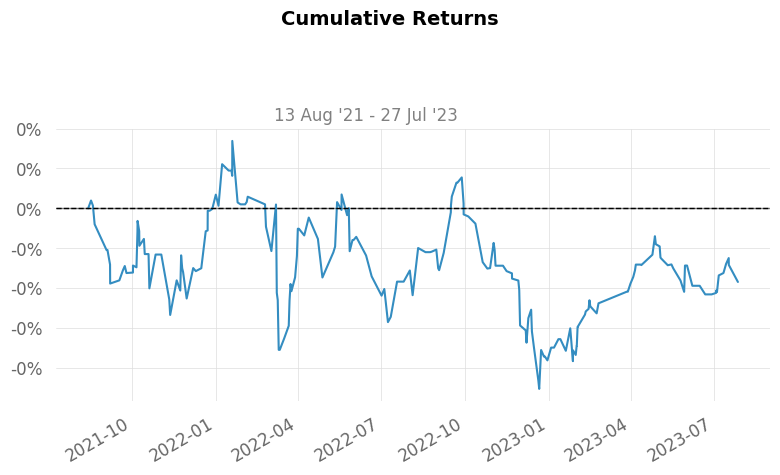

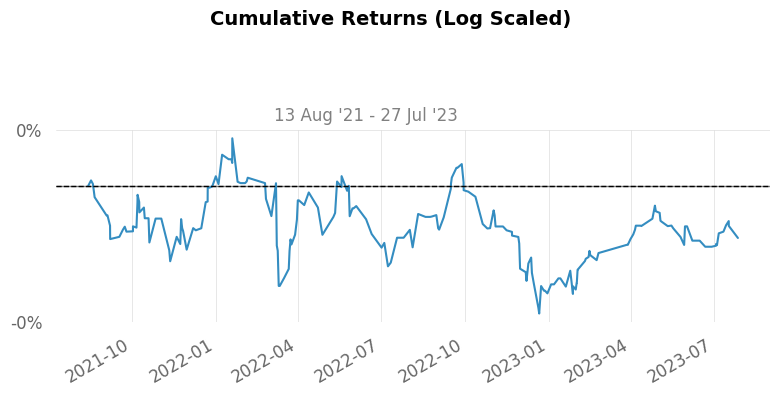

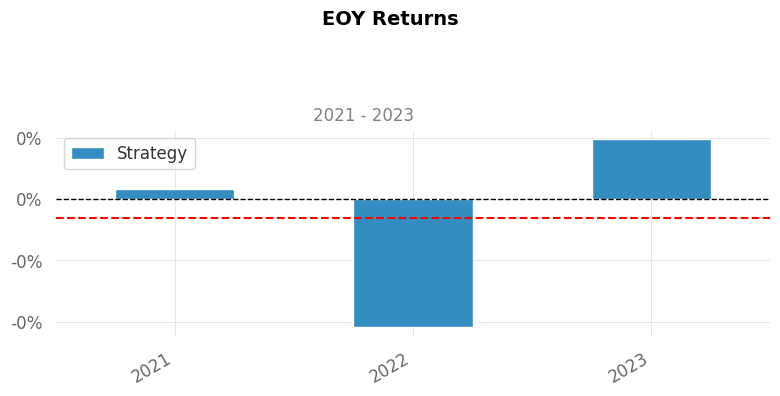

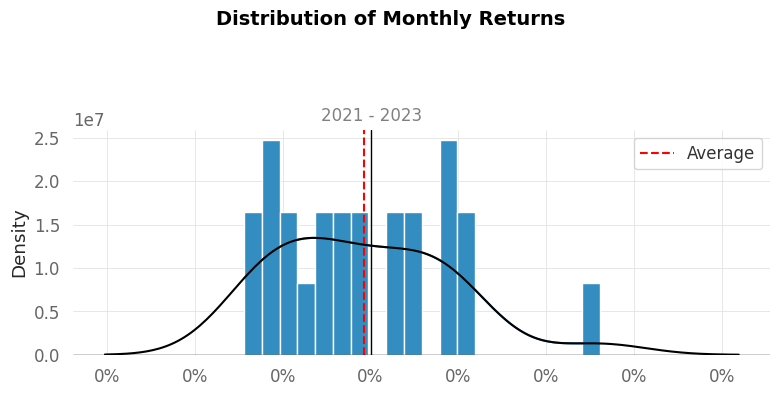

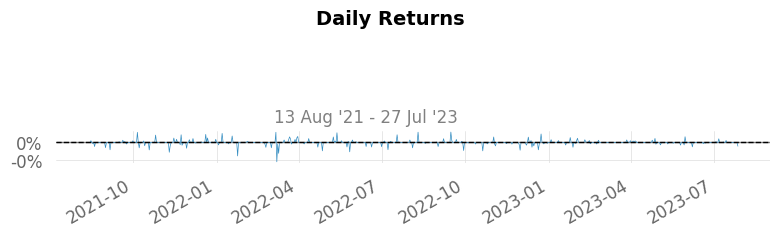

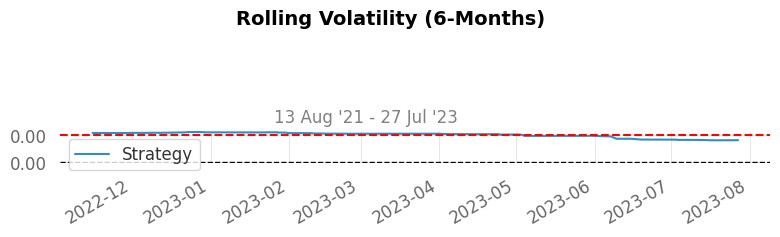

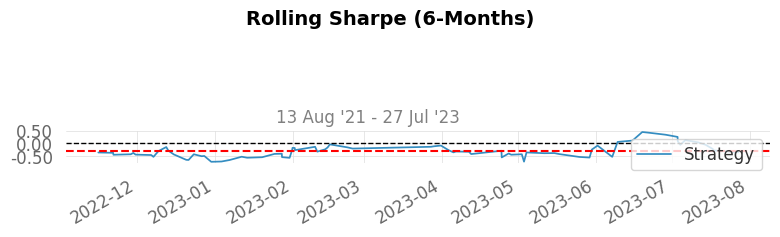

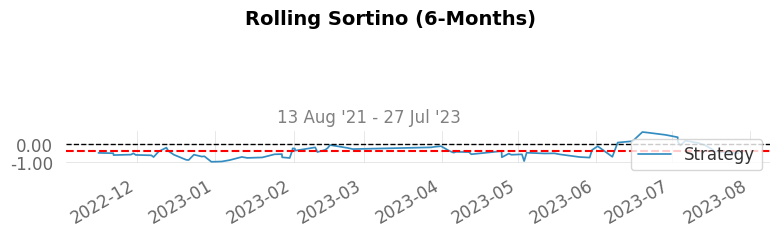

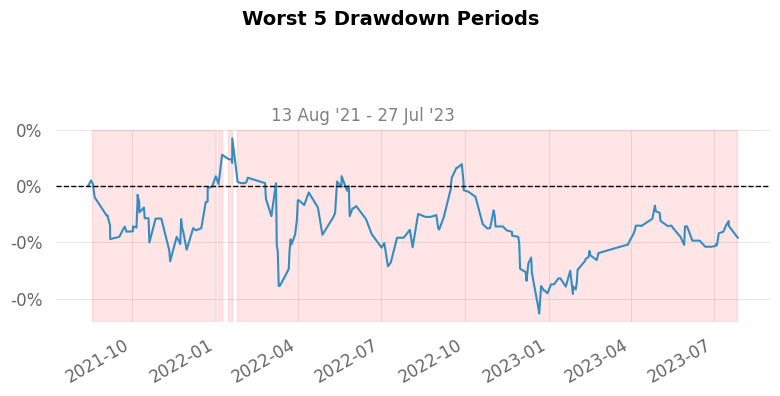

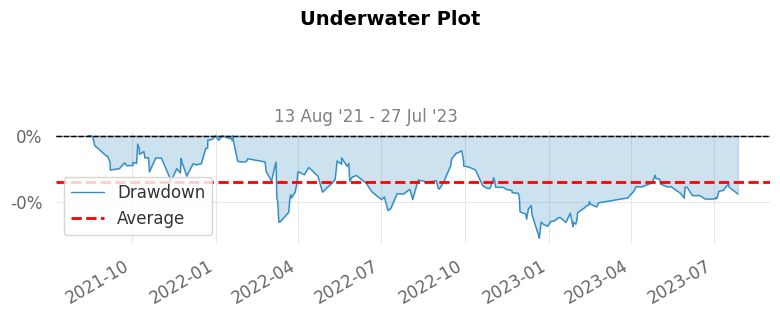

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


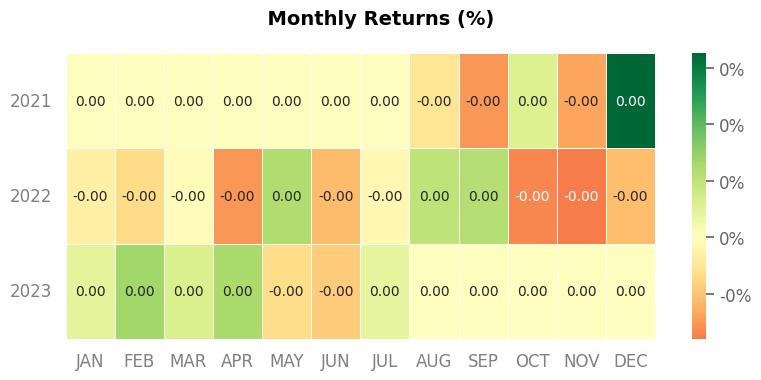

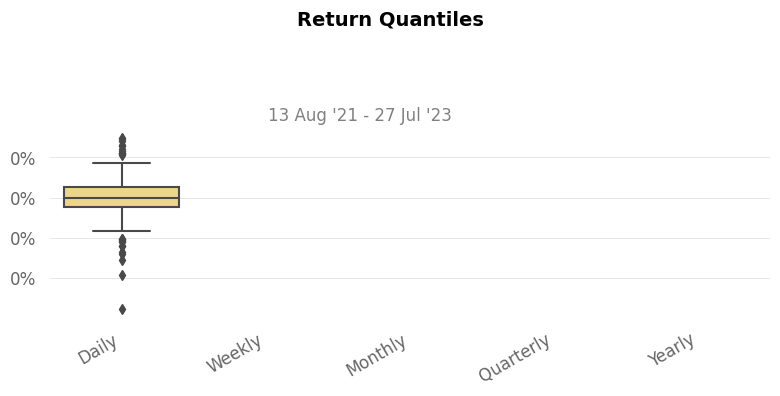

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 273582df8aec40379aadf57ee631ef27 |
| Transaction Type | SELL                             |
| Instrument       | NSE:HINDALCO                     |
| Quantity         | 2                                |
| Price            | ₹451.45                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T13:05:02.912231Z | COMPLETE               |
| 2023-10-23T13:05:02.912214Z | OPEN                   |
| 2023-10-23T13:05:02.912196Z | OPEN PENDING           |
| 2023-10-23T13:05:02.912174Z | VALIDATION PENDING     |
| 2023-10-23T13:05:02.912107Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 0e234d32bac843f59

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---